In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In order to get a greater idea of some suitable priors that could potentially be used in our future model, I looked at a sample of RGB stars and applied a model to each of them. The same starting priors were used for each run to see how well they could fit a range of stars.

In [5]:
df = pd.read_csv('rgbpriors.csv')
df.describe()

,ID,dnu,nmax,epsilon,k,A,omega,phi,tau
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.014455e+07,5.289000,8.949000,0.421000,0.037000,0.189000,3.057000,0.281900,7.574000
std,1.600040e+06,2.912515,1.687499,0.370179,0.006749,0.013703,0.293373,1.993442,1.613831
min,7.811522e+06,2.500000,7.010000,0.070000,0.030000,0.170000,2.440000,-2.220000,5.460000
25%,8.871190e+06,3.720000,7.627500,0.120000,0.030000,0.180000,3.015000,-0.792500,6.400000
50%,1.030913e+07,4.405000,8.680000,0.210000,0.040000,0.190000,3.080000,-0.140500,7.475000
75%,1.160357e+07,5.757500,10.092500,0.830000,0.040000,0.190000,3.140000,0.932500,8.777500
max,1.200516e+07,12.880000,12.070000,0.890000,0.050000,0.220000,3.550000,4.790000,10.140000


It is clear from looking at the summary statistics above, some of the parameters vary more significantly than others. We can say with some confidence that the following variables can likely be modelled with the following parameters:

$k \sim \mathcal{N} (0.037, 0.006^2)$

$A \sim \mathcal{N} (0.189, 0.014^2)$

$\omega \sim \mathcal{N} (3.057, 0.293^2)$

We can also look at the asymptotic relationships found in the Vrard Paper:

Parameter | RGB Stars _(asymptotic parameters)_
------------ | -------------
$\epsilon$ | $0.601+0.632\log\left<\Delta\nu\right>$
$n_{max}$ | $\frac{\nu_{max}}{\left<\Delta\nu\right>} - \epsilon$
$\alpha$ | $0.015\left<\Delta\nu\right>^{-0.32}$
$\mathcal{A}$ | $0.06\left<\Delta\nu\right>^{-0.88\pm0.05}$
$\mathcal{G}$ | $3.08\pm0.65$
$\phi$ | $1.71\pm0.77$

The two plots below are an attempt to roughly replicate Figure 5-6 in the Vrard paper, despite the limited sample size. The $A$ in our model is different to the parameter used in the paper $A \equiv \frac{\mathcal{AG}}{2\pi}$.

The sample does appear to have an outlier however, being a star that has a higher $\Delta\nu$ and $n_{max}$ than the others. Perhaps this is suggestive of a star in a different evolutionary state (sub-giant of clump star potentially) - the higher frequencies are usually indicative of a smaller object?

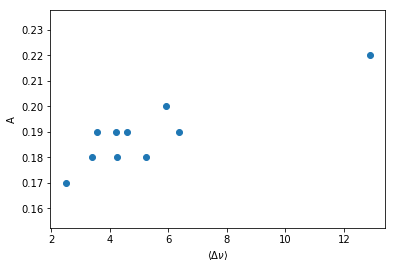

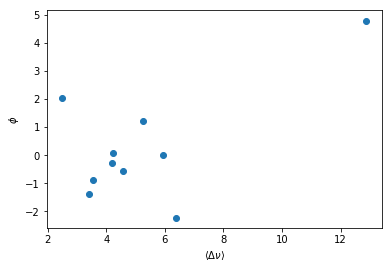

In [11]:
plt.scatter(df['dnu'],df['A'])
plt.xlabel(r'$\left<\Delta\nu\right>$')
plt.ylabel(r'A')
plt.show()
plt.scatter(df['dnu'],df['phi'])
plt.xlabel(r'$\left<\Delta\nu\right>$')
plt.ylabel(r'$\phi$')
plt.show()